In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving covid.csv to covid.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['covid.csv']))
df

,country,pop,pop_density,literacy,health_GDP,testings_10,testings_40,hospital_beds,recovery_20,recovery_60,weeks_to_flat
0,U S,328.20,92.9,86.00,3644.6,20,490.0,2.77,7.1026,151.300,21.0
1,Pakistan,220.00,742.0,65.00,2.8,8,30.0,0.60,46.9000,252.110,18.1
2,Bangladesh,161.40,2889.5,72.89,7.2,5,30.0,0.80,22.5200,211.264,12.7
3,Russia,144.50,23.0,99.73,87.4,70,910.0,8.05,66.2300,187.355,8.9
4,Egypt,98.40,266.0,71.17,16.0,10,30.0,1.60,216.4100,239.190,19.4
5,Germany,83.00,623.0,99.00,434.6,190,700.0,8.00,10.3000,721.220,5.1
6,Turkey,82.90,284.0,96.15,31.2,50,460.0,2.81,38.4900,724.670,4.6
7,France,67.00,309.0,99.00,306.2,118,5114.0,5.98,117.7800,375.480,10.7
8,United Kingdom,66.60,712.2,99.00,268.8,40,240.0,2.54,123.4600,346.230,6.9
9,Italy,60.40,532.0,98.85,174.9,40,520.0,3.18,83.3200,281.190,5.1


In [ ]:
df.dtypes

country           object
pop              float64
pop_density      float64
literacy         float64
health_GDP       float64
testings_10        int64
testings_40      float64
hospital_beds    float64
recovery_20      float64
recovery_60      float64
weeks_to_flat    float64
dtype: object

In [ ]:
df["testings_10"] = df["testings_10"].astype("float64")

In [ ]:
df.dtypes

country           object
pop              float64
pop_density      float64
literacy         float64
health_GDP       float64
testings_10      float64
testings_40      float64
hospital_beds    float64
recovery_20      float64
recovery_60      float64
weeks_to_flat    float64
dtype: object

In [ ]:
df = df.drop([0],[21],[22], axis=0, inplace = True)

TypeError: ignored

In [ ]:
df.head()

AttributeError: ignored

In [ ]:
df["pop"]= df["pop"]/df["pop"].max()

In [ ]:
df["pop"]= df["pop"]/df["pop"].max()
df["pop_density"]= df["pop_density"]/df["pop_density"].max()
df["literacy"]= df["literacy"]/df["literacy"].max()
df["health_GDP"]= df["health_GDP"]/df["health_GDP"].max()
df["testings_10"]= df["testings_10"]/df["testings_10"].max()
df["testings_40"]= df["testings_40"]/df["testings_40"].max()
df["hospital_beds"]= df["hospital_beds"]/df["hospital_beds"].max()
df["recovery_20"]= df["recovery_20"]/df["recovery_20"].max()
df["recovery_60"]= df["recovery_60"]/df["recovery_60"].max()


In [ ]:
df.head()

,country,pop,pop_density,literacy,health_GDP,testings_10,testings_40,hospital_beds,recovery_20,recovery_60,weeks_to_flat
1,Pakistan,1.000000,0.256792,0.651760,0.018408,0.002296,0.001439,0.074534,0.089593,0.262776,0.932990
2,Bangladesh,0.733636,1.000000,0.730873,0.016567,0.001435,0.001439,0.099379,0.043020,0.220202,0.654639
3,Russia,0.656818,0.007960,1.000000,0.201104,0.020086,0.043635,1.000000,0.126519,0.195281,0.458763
4,Egypt,0.447273,0.092057,0.713627,0.036815,0.002869,0.001439,0.198758,0.413406,0.249309,1.000000
5,Germany,0.377273,0.215608,0.992680,1.000000,0.054519,0.033565,0.993789,0.019676,0.751733,0.262887


In [ ]:
df["weeks_to_flat"]= df["weeks_to_flat"]/df["weeks_to_flat"].max()

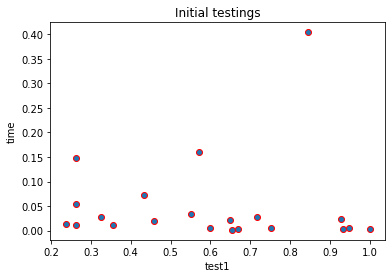

In [ ]:
test1 = df['testings_10']
time = df['weeks_to_flat']
plt.scatter( time,test1, edgecolors='r')
plt.xlabel('test1')
plt.ylabel('time')
plt.title('Initial testings')
plt.show()

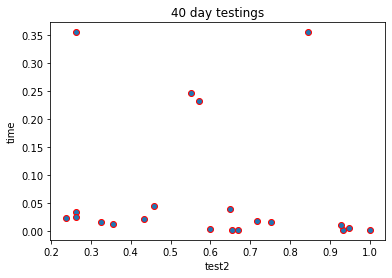

In [ ]:
test2 = df['testings_40']
time = df['weeks_to_flat']
plt.scatter(time,test2 , edgecolors='r')
plt.xlabel('test2')
plt.ylabel('time')
plt.title('40 day testings')
plt.show()

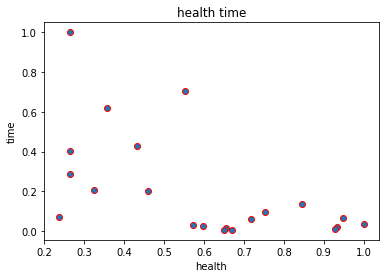

In [ ]:
health = df['health_GDP']
time = df['weeks_to_flat']
plt.scatter( time,health , edgecolors='r')
plt.xlabel('health')
plt.ylabel('time')
plt.title('health time')
plt.show()

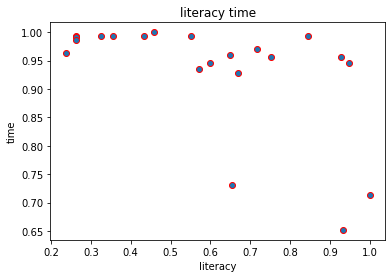

In [ ]:
literacy = df['literacy']
time = df['weeks_to_flat']
plt.scatter( time,literacy, edgecolors='r')
plt.xlabel('literacy')
plt.ylabel('time')
plt.title('literacy time')
plt.show()

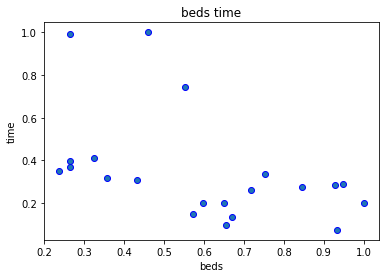

In [ ]:
beds = df['hospital_beds']
time = df['weeks_to_flat']
plt.scatter( time,beds, edgecolors='b')
plt.xlabel('beds')
plt.ylabel('time')
plt.title('beds time')
plt.show()

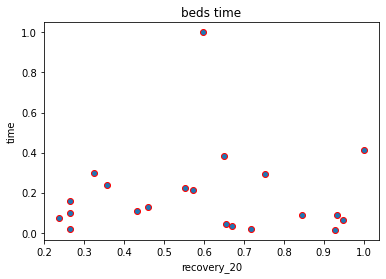

In [ ]:
recovery_20 = df['recovery_20']
time = df['weeks_to_flat']
plt.scatter( time,recovery_20, edgecolors='r')
plt.xlabel('recovery_20')
plt.ylabel('time')
plt.title('beds time')
plt.show()

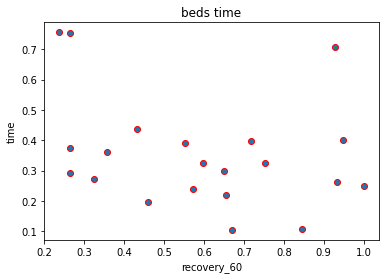

In [ ]:
recovery_60 = df['recovery_60']
time = df['weeks_to_flat']
plt.scatter( time,recovery_60, edgecolors='r')
plt.xlabel('recovery_60')
plt.ylabel('time')
plt.title('beds time')
plt.show()

In [ ]:
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = df.iloc[:,1 :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.48 0.26]
 [0.69 0.6 ]
 [0.51 0.93]
 [0.09 0.65]
 [0.67 0.43]]


In [ ]:
regressor.score(X_test , y_test)

-1.411195529891176